# An Analysis on the Facebook Profiles of Manila, Quezon, and Cebu City PIO

### Overview 
1. place things here

In [1]:
import csv
import json
import pandas as pd
import numpy as np
import sys
import ast
import matplotlib as plt
import matplotlib.pyplot as plt
import re

from facebook_scraper import get_posts
from pandas.plotting import scatter_matrix

%matplotlib inline

## Facebook Data Scraper

#### For Quezon City PIO

In [2]:
with open('./data/itm-final-project-qc.csv','w') as csvfile:
    field_names =['post','time','image','num of likes','num of comments','comments','reacts']
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    
    try:
        for post in get_posts('QCGov', cookies="./cookies/cookies_qc.txt", options={"comments":True}, pages=200, extra_info = True):
            text = post['text']
            time = post['time']
            image = post['image']
            num_likes = post['likes']
            num_comments = post['comments']
            reactions = post['reactions']

            comments = []
            #for posts without comments
            try:
                for i in post['comments_full']:
                    comments.append(i['comment_text'])
            except:
                pass

            writer.writerow({'post': text,'time':time,'image':image,'num of likes':num_likes,'num of comments': num_comments,'comments':comments, 'reacts':reactions})
    except:
        print('Error')

Error


#### For Manila City PIO

In [3]:
with open('./data/itm-final-project-manila.csv','w') as csvfile:
    field_names =['post','time','image','num of likes','num of comments','comments','reacts']
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    
    try:
        for post in get_posts('ManilaPIO', cookies="./cookies/cookies_manila.txt", options={"comments":True}, pages=200, extra_info = True):
            text = post['text']
            time = post['time']
            image = post['image']
            num_likes = post['likes']
            num_comments = post['comments']
            reactions = post['reactions']

            comments = []
            #for posts without comments
            try:
                for i in post['comments_full']:
                    comments.append(i['comment_text'])
            except:
                pass

            writer.writerow({'post': text,'time':time,'image':image,'num of likes':num_likes,'num of comments': num_comments,'comments':comments, 'reacts':reactions})
    except:
        print('Error')

Error


#### For Cebu City PIO

In [4]:
with open('./data/itm-final-project-cebu.csv','w') as csvfile:
    field_names =['post','time','image','num of likes','num of comments','comments','reacts']
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    
    try:
        for post in get_posts('CityofCebuOfficial', cookies="./cookies/cookies_cebu.txt", options={"comments":True}, pages=200, extra_info = True):
            text = post['text']
            time = post['time']
            image = post['image']
            num_likes = post['likes']
            num_comments = post['comments']
            reactions = post['reactions']

            comments = []
            #for posts without comments
            try:
                for i in post['comments_full']:
                    comments.append(i['comment_text'])
            except:
                pass

            writer.writerow({'post': text,'time':time,'image':image,'num of likes':num_likes,'num of comments': num_comments,'comments':comments, 'reacts':reactions})
    except:
        print('Error')

Error


## Create CSVs for COVID-related posts and non-COVID-related posts

#### For Quezon City

In [28]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

covid_post = []
noncovid_post = []
keywords = 'coronavirus|covid|covid-19|delta|variant|symptomatic|asymptomatic|social distancing|quarantine|lockdown|gcq|ecq|bakuna|vax|vaccine|pandemic|herd immunity|pfizer|astrazeneca|sputnik|moderna|novovac|sinovac|coronavac'

filename = './data/itm-final-project-qc.csv'
with open(filename,"r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        indiv_post = row['post'].lower()
        try:
            re.search(keywords,indiv_post).group()
            covid_post.append(indiv_post)
        except:
            noncovid_post.append(indiv_post)

#change file name
with open('./data/covid-posts-qc.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in covid_post:
        csvwriter.writerow([p])

with open('./data/noncovid-posts-qc.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in noncovid_post:
        csvwriter.writerow([p])

#### For Manila City

In [8]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

covid_post = []
noncovid_post = []
keywords = 'coronavirus|covid|covid-19|delta|variant|symptomatic|asymptomatic|social distancing|quarantine|lockdown|gcq|ecq|bakuna|vax|vaccine|pandemic|herd immunity|pfizer|astrazeneca|sputnik|moderna|novovac|sinovac|coronavac'

filename = './data/itm-final-project-manila.csv'
with open(filename,"r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        indiv_post = row['post'].lower()
        try:
            re.search(keywords,indiv_post).group()
            covid_post.append(indiv_post)
        except:
            noncovid_post.append(indiv_post)

#change file name
with open('./data/covid-posts-manila.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in covid_post:
        csvwriter.writerow([p])

with open('./data/noncovid-posts-manila.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in noncovid_post:
        csvwriter.writerow([p])

#### For Cebu City

In [9]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

covid_post = []
noncovid_post = []
keywords = 'coronavirus|covid|covid-19|delta|variant|symptomatic|asymptomatic|social distancing|quarantine|lockdown|gcq|ecq|bakuna|vax|vaccine|pandemic|herd immunity|pfizer|astrazeneca|sputnik|moderna|novovac|sinovac|coronavac'

filename = './data/itm-final-project-cebu.csv'
with open(filename,"r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        indiv_post = row['post'].lower()
        try:
            re.search(keywords,indiv_post).group()
            covid_post.append(indiv_post)
        except:
            noncovid_post.append(indiv_post)

#change file name
with open('./data/covid-posts-cebu.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in covid_post:
        csvwriter.writerow([p])

with open('./data/noncovid-posts-cebu.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for p in noncovid_post:
        csvwriter.writerow([p])

## Format datasets per city

#### Add a new column 'total_reacts' to get the total no. of reacts per post

In [5]:
def get_total_reacts(reacts_str):
    total_reacts = 0
    if type(reacts_str) == float:
        reacts_str= str(reacts_str)
    # remove commas and {}
    reacts_str = reacts_str.replace(","," ").replace("}", "")
    # use list comprehension to get integers
    reacts_list = [int(word) for word in reacts_str.split() if word.isdigit()]
    # add each element of reacts_list
    for react_amount in reacts_list:
        total_reacts += react_amount
    return(total_reacts)

filename_list = ['./data/itm-final-project-qc.csv','./data/itm-final-project-manila.csv','./data/itm-final-project-cebu.csv']

for filename in filename_list:
    df = pd.read_csv(filename)
    df['total_reacts'] = df['reacts'].apply(get_total_reacts)
    df.to_csv(filename, index = False)

#### Add new column 'topic' to determine if post is COVID related or not.

In [29]:
# READING CSV FILES

# CEBU READ
with open ("./data/itm-final-project-cebu.csv", "r") as cebu_csv:
    cebu_read = pd.read_csv(cebu_csv)
    
cebu_read.sort_values(by=['total_reacts', 'num of comments'], inplace=True, ascending = False)

with open ("./data/covid-posts-cebu.csv", "r") as cebu_covid_csv:
    cebu_covid = pd.read_csv(cebu_covid_csv)
    
with open ("./data/noncovid-posts-cebu.csv", "r") as cebu_noncovid_csv:
    cebu_noncovid = pd.read_csv(cebu_noncovid_csv)
    
# MANILA READ
with open ("./data/itm-final-project-manila.csv", "r") as manila_csv:
    manila_read = pd.read_csv(manila_csv)
    
manila_read.sort_values(by=['total_reacts', 'num of comments'], inplace=True, ascending = False)

with open ("./data/covid-posts-manila.csv", "r") as manila_covid_csv:
    manila_covid = pd.read_csv(manila_covid_csv)

with open ("./data/noncovid-posts-manila.csv", "r") as manila_noncovid_csv:
    manila_noncovid = pd.read_csv(manila_noncovid_csv)

# QC READ

with open ("./data/itm-final-project-qc.csv", "r") as qc_csv:
    qc_read = pd.read_csv(qc_csv)
    
qc_read.sort_values(by=['total_reacts', 'num of comments'], inplace=True, ascending = False)

with open ("./data/covid-posts-qc.csv", "r") as qc_covid_csv:
    qc_covid = pd.read_csv(qc_covid_csv)

with open ("./data/noncovid-posts-cebu.csv", "r") as qc_noncovid_csv:
    qc_noncovid = pd.read_csv(qc_noncovid_csv)
    
# Adding Column for Covid vs Non-Covid in ITM files

keywords = ['coronavirus','covid','covid-19','delta','variant','symptomatic','asymptomatic','social distancing','quarantine','lockdown','gcq','ecq','bakuna','vax','vaccine','pandemic','herd immunity','pfizer','astrazeneca','sputnik','moderna','novovac','sinovac','coronavac']

# CEBU

cebu_read = cebu_read.apply(lambda x: x.astype(str).str.lower())

cebu_read["topic"] = cebu_read['post'].astype(str).apply(lambda x: any([k in x for k in keywords]))
cebu_read = cebu_read.replace({True: 'covid', False: 'noncovid'})

cebu_read.to_csv("./data/itm-final-project-cebu.csv", index = False)

# MANILA

manila_read = manila_read.apply(lambda x: x.astype(str).str.lower())

manila_read["topic"] = manila_read['post'].astype(str).apply(lambda x: any([k in x for k in keywords]))
manila_read = manila_read.replace({True: 'covid', False: 'noncovid'})

manila_read.to_csv("./data/itm-final-project-manila.csv", index = False)

# QC

qc_read = qc_read.apply(lambda x: x.astype(str).str.lower())

qc_read["topic"] = qc_read['post'].astype(str).apply(lambda x: any([k in x for k in keywords]))
qc_read = qc_read.replace({True: 'covid', False: 'noncovid'})

qc_read.to_csv("./data/itm-final-project-qc.csv", index = False)

## Format Overall: Combine all raw data into one csv file

In [11]:
data_qc = pd.read_csv('./data/itm-final-project-qc.csv')
data_manila = pd.read_csv('./data/itm-final-project-manila.csv')
data_cebu = pd.read_csv('./data/itm-final-project-cebu.csv')

master_data = data_qc.append(data_manila.append(data_cebu))
master_data.reset_index(drop = True, inplace = True) # keep this because if u simply combine, the index gets wierd

master_data.to_csv('./data/master-data.csv')

## Average reacts and comments (COVID vs non-COVID posts) -- VISUALIZE THE DATA

In [30]:
# Average reacts and comments (COVID vs Non-COVID)

avestats = pd.DataFrame(index = ['cebu','manila','qc'], columns = ['reacts_covid','comments_covid','reacts_noncovid','comments_noncovid'])
avestats['reacts_covid'] = 0
avestats['comments_covid'] = 0
avestats['reacts_noncovid'] = 0
avestats['comments_noncovid'] = 0
cebu_covid_count = 0
cebu_noncovid_count = 0
manila_covid_count = 0
manila_noncovid_count = 0
qc_covid_count = 0
qc_noncovid_count = 0

# CEBU

cebu_read = cebu_read.astype({"total_reacts": int, "num of comments": int})

for i in range(len(cebu_read['topic'])):
    if cebu_read.topic[i] == "covid":
        avestats.reacts_covid["cebu"] += cebu_read.total_reacts[i]
        avestats.comments_covid["cebu"] += cebu_read["num of comments"][i]
        
        cebu_covid_count += 1
        
    if cebu_read.topic[i] == "noncovid":
        avestats.reacts_noncovid["cebu"] += cebu_read.total_reacts[i]
        avestats.comments_noncovid["cebu"] += cebu_read["num of comments"][i]
        
        cebu_noncovid_count += 1
        
avestats.reacts_covid["cebu"] = avestats.reacts_covid["cebu"]/cebu_covid_count
avestats.comments_covid["cebu"] = avestats.comments_covid["cebu"]/cebu_covid_count
avestats.reacts_noncovid["cebu"] = avestats.reacts_noncovid["cebu"]/cebu_noncovid_count
avestats.comments_noncovid["cebu"] = avestats.comments_noncovid["cebu"]/cebu_noncovid_count

# MANILA

manila_read = manila_read.astype({"total_reacts": int, "num of comments": int})

for i in range(len(manila_read['topic'])):
    if manila_read.topic[i] == "covid":
        avestats.reacts_covid["manila"] += manila_read.total_reacts[i]
        avestats.comments_covid["manila"] += manila_read["num of comments"][i]
        
        manila_covid_count += 1
        
    if manila_read.topic[i] == "noncovid":
        avestats.reacts_noncovid["manila"] += manila_read.total_reacts[i]
        avestats.comments_noncovid["manila"] += manila_read["num of comments"][i]
        
        manila_noncovid_count += 1
        
avestats.reacts_covid["manila"] = avestats.reacts_covid["manila"]/manila_covid_count
avestats.comments_covid["manila"] = avestats.comments_covid["manila"]/manila_covid_count
avestats.reacts_noncovid["manila"] = avestats.reacts_noncovid["manila"]/manila_noncovid_count
avestats.comments_noncovid["manila"] = avestats.comments_noncovid["manila"]/manila_noncovid_count

# QC

qc_read = qc_read.astype({"total_reacts": int, "num of comments": int})

for i in range(len(qc_read['topic'])):
    if qc_read.topic[i] == "covid":
        avestats.reacts_covid["qc"] += qc_read.total_reacts[i]
        avestats.comments_covid["qc"] += qc_read["num of comments"][i]
        
        qc_covid_count += 1
        
    if qc_read.topic[i] == "noncovid":
        avestats.reacts_noncovid["qc"] += qc_read.total_reacts[i]
        avestats.comments_noncovid["qc"] += qc_read["num of comments"][i]
        
        qc_noncovid_count += 1
        
avestats.reacts_covid["qc"] = avestats.reacts_covid["qc"]/qc_covid_count
avestats.comments_covid["qc"] = avestats.comments_covid["qc"]/qc_covid_count
avestats.reacts_noncovid["qc"] = avestats.reacts_noncovid["qc"]/qc_noncovid_count
avestats.comments_noncovid["qc"] = avestats.comments_noncovid["qc"]/qc_noncovid_count

# FILE
avestats.to_csv("./data/itm-average-stats.csv")

In [41]:
avestats

reacts_covid  comments_covid  reacts_noncovid  comments_noncovid
cebu             461             191              208                 42
manila          1516             453              801                127
qc               992             216              870                276

## Correlation between length of post and engagement(reactions)

In [13]:
# Add column for post's word count
all_len = []

for k in master_data['post'].astype(str):
    all_len.append(len(k.split()))
    
master_data['post_word_count'] = all_len

In [14]:
# categorize word count and make new column for category
def categorize_word_count(word_count):
    if word_count <= 30:
        return "0-30"
    elif word_count <= 60:
        return "31-60"
    elif word_count <= 90:
        return "61-90"
    elif word_count <= 120:
        return "91-120"
    elif word_count <= 150:
        return "121-150"
    elif word_count <= 180:
        return "151-180"
    else:
        return "180+"

master_data['word count category'] = master_data['post_word_count'].apply(categorize_word_count)
master_data['count'] = 1
master_data

post                 time  \
0    naglabas ng panuntunan ang department of labor...  2021-08-04 11:14:00   
1    upang siguruhin ang pagsunod sa minimum health...  2021-08-05 12:36:38   
2    paglilinaw: patakaran tungkol sa quarantine pa...  2021-08-06 17:56:42   
3    mahalagang anunsyo\n\npatuloy po ang ating #qc...  2021-08-03 23:44:55   
4    upang maipagpatuloy ang kanilang kabuhayan kap...  2021-08-06 07:27:00   
..                                                 ...                  ...   
543  president rodrigo roa duterte delivers his int...  2021-07-16 22:12:00   
544  president rodrigo roa duterte meets with sever...  2021-07-19 22:47:00   
545  uswag, pinas! special edition features the mas...  2021-07-16 16:00:00   
546  president rodrigo roa duterte convenes several...  2021-07-06 23:57:00   
547  fri, jul 30\ncebu city quincentennial lecture ...  2021-07-13 09:35:00   

                                                 image  num of likes  \
0    https://scontent.fmnl8-2.fna.fbcdn.net/v/t1.64...          6077   
1    https://scontent.fmnl8-1.fna.fbcdn.net/v/t1.64...          4965   
2    https://scontent.fmnl8-2.fna.fbcdn.net/v/t1.64...          4539   
3    https://scontent.fmnl8-2.fna.fbcdn.net/v/t1.64...          4312   
4    https://scontent.fmnl8-2.fna.fbcdn.net/v/t1.64...          3045   
..                                                 ...           ...   
543                                                NaN             5   
544                                                NaN             5   
545                                                NaN             3   
546                                                NaN             4   
547  https://scontent.fmnl8-1.fna.fbcdn.net/v/t1.64...             9   

     num of comments                                           comments  \
0               2100  ['marami nga gusto magpa bakuna kulang naman s...   
1               2100  ['registered.\n\nwaiting for the longest time....   
2                533  ['eh panu maging bakunado e sobrang tagal magb...   
3               1600  ['bakit po sa ibang lungsod pati sa cavite may...   
4               1000  ['sana ako din po mayor mabigyan po ako ng bik...   
..               ...                                                ...   
543                1  ['is cebu - cordova link bridge a duterte proj...   
544                0                                                 []   
545                0                                                 []   
546                0                                                 []   
547                0                                                 []   

                                                reacts  total_reacts  \
0    {'like': 6077, 'love': 205, 'haha': 37, 'wow':...          6449   
1    {'like': 4965, 'love': 670, 'haha': 79, 'wow':...          5793   
2    {'like': 4539, 'love': 482, 'haha': 14, 'wow':...          5069   
3    {'like': 4312, 'love': 427, 'haha': 34, 'wow':...          4842   
4    {'like': 3045, 'love': 801, 'haha': 11, 'wow':...          4040   
..                                                 ...           ...   
543                                        {'like': 5}             5   
544                                        {'like': 5}             5   
545                             {'like': 3, 'care': 1}             4   
546                                        {'like': 4}             4   
547                                                NaN             0   

        topic  post_word_count word count category  count  
0       covid               70               61-90      1  
1       covid               55               31-60      1  
2       covid               75               61-90      1  
3       covid              126             121-150      1  
4       covid               98              91-120      1  
..        ...              ...                 ...    ...  
543     covid              311                180+

In [15]:
# create bar graph based on category and number of likes

# format and create a new dataframe for bar graph
category_likes_df = master_data[['word count category', 'total_reacts','count']].copy()
bar_df = category_likes_df.groupby(['word count category']).sum()
bar_df.reset_index(inplace = True)

def get_word_count_start(word_count):
    try:
        j = int(word_count.split('-')[0])
        return(j)
    except:
        return(int(word_count[:len(word_count)-1]))
    
#def get_average(total_reacts):
bar_df['ave_reacts'] = bar_df['total_reacts']/bar_df['count']
bar_df['word count start'] = bar_df['word count category'].apply(get_word_count_start)
    
bar_df.sort_values('word count start', ascending = True, inplace = True)
bar_df.drop(columns = ['word count start'])

word count category  total_reacts  count   ave_reacts
0                0-30         79181     82   965.621951
4               31-60        108694    119   913.394958
5               61-90         95188    114   834.982456
6              91-120         61733     81   762.135802
1             121-150         47737     46  1037.760870
2             151-180         35582     34  1046.529412
3                180+         81417     72  1130.791667

Text(0.5, 1.0, 'Average Reactions for Each Word Count Category')

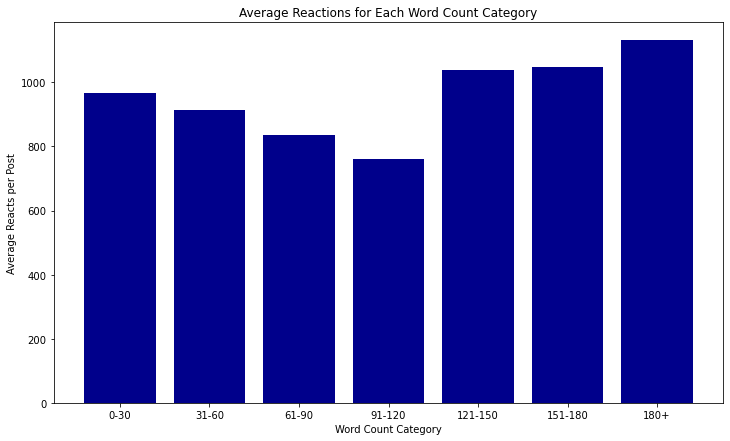

In [16]:
# for bar graph
fig, ax = plt.subplots(figsize = (12,7))

ax.bar(height=bar_df['ave_reacts'],x=bar_df['word count category'], color = 'DarkBlue')
ax.set_xlabel('Word Count Category')
ax.set_ylabel('Average Reacts per Post')
ax.set_title('Average Reactions for Each Word Count Category')

Text(0.5, 1.0, 'Total Reacts VS Word Count')

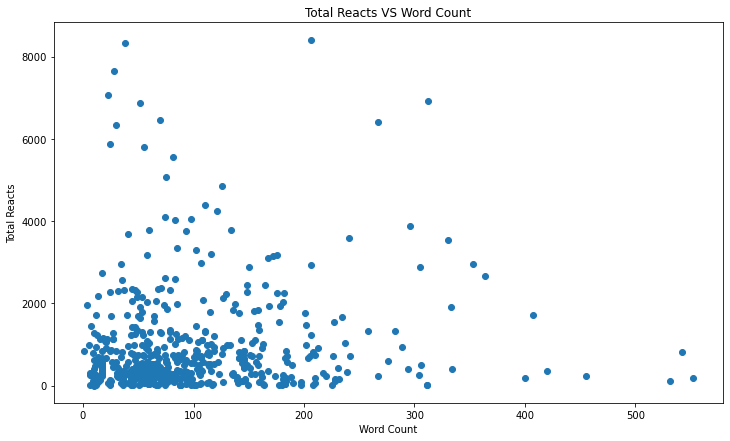

In [17]:
# create scatter plot for total reacts VS. word count
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(master_data['post_word_count'], master_data['total_reacts'])
ax.set_xlabel('Word Count')
ax.set_ylabel('Total Reacts')
ax.set_title('Total Reacts VS Word Count')

In [18]:
# Pearson's Correlation Test - word count vs no. of reactions
cor_df = master_data[['post_word_count','total_reacts']].dropna()
cor_df.corr()

post_word_count  total_reacts
post_word_count         1.000000      0.066877
total_reacts            0.066877      1.000000

## Scatter Matrix for correlation between LGUs

array([[<AxesSubplot:xlabel='QC Reacts', ylabel='QC Reacts'>,
        <AxesSubplot:xlabel='Manila Reacts', ylabel='QC Reacts'>,
        <AxesSubplot:xlabel='Cebu Reacts', ylabel='QC Reacts'>],
       [<AxesSubplot:xlabel='QC Reacts', ylabel='Manila Reacts'>,
        <AxesSubplot:xlabel='Manila Reacts', ylabel='Manila Reacts'>,
        <AxesSubplot:xlabel='Cebu Reacts', ylabel='Manila Reacts'>],
       [<AxesSubplot:xlabel='QC Reacts', ylabel='Cebu Reacts'>,
        <AxesSubplot:xlabel='Manila Reacts', ylabel='Cebu Reacts'>,
        <AxesSubplot:xlabel='Cebu Reacts', ylabel='Cebu Reacts'>]],
      dtype=object)

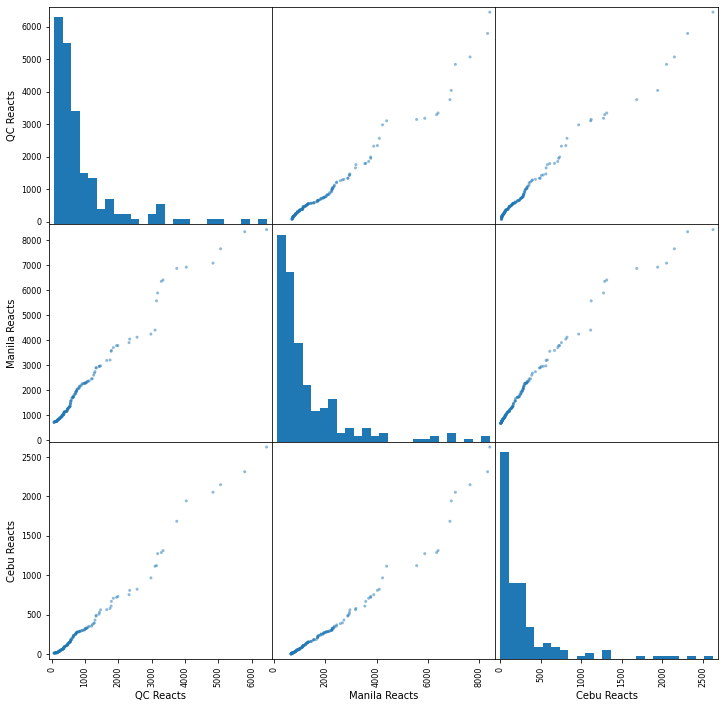

In [26]:
city_comp = pd.concat([qc_df['total_reacts'],mnl_df['total_reacts'],cebu_df['total_reacts']], axis = 1)
city_comp.columns = ['QC Reacts','Manila Reacts','Cebu Reacts']

scatter_matrix(city_comp, figsize=(12,12), hist_kwds={'bins':25})

## Visualizing data per city

In [20]:
qc_df = pd.read_csv("./data/itm-final-project-qc.csv")
mnl_df = pd.read_csv("./data/itm-final-project-manila.csv")
cebu_df = pd.read_csv("./data/itm-final-project-cebu.csv")

# create new dataframes for just time and total_reacts columns
qc_time_df = qc_df[['time','total_reacts']].copy()
qc_time_df.sort_values('time', inplace = True)
qc_time_df.set_index('time', drop=False, inplace=True)

mnl_time_df = mnl_df[['time','total_reacts']].copy()
mnl_time_df.sort_values('time', inplace = True)
mnl_time_df.set_index('time', drop=False,inplace=True)

cebu_time_df = cebu_df[['time','total_reacts']].copy()
cebu_time_df.sort_values('time', inplace = True)
cebu_time_df.set_index('time', drop=False, inplace=True)

# make column for date one (no time)
def get_date(time):
    return(time[0:10])

qc_time_df['date'] = qc_time_df['time'].apply(get_date)
mnl_time_df['date'] = mnl_time_df['time'].apply(get_date)
cebu_time_df['date'] = cebu_time_df['time'].apply(get_date)

#### Scatter plots per city (Total Reacts VS Date)

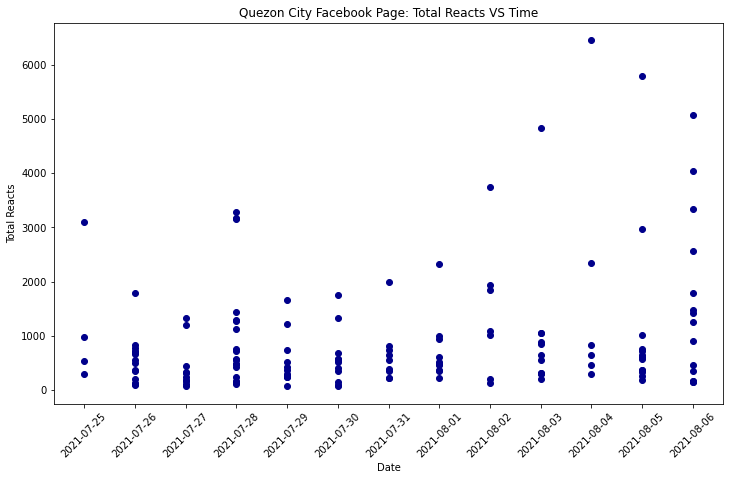

In [21]:
# QC
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(qc_time_df['date'],qc_time_df['total_reacts'], color = "DarkBlue")
ax.set_xlabel('Date')
ax.set_ylabel('Total Reacts')
ax.set_title('Quezon City Facebook Page: Total Reacts VS Time')
ax.tick_params(axis='x', rotation=45)

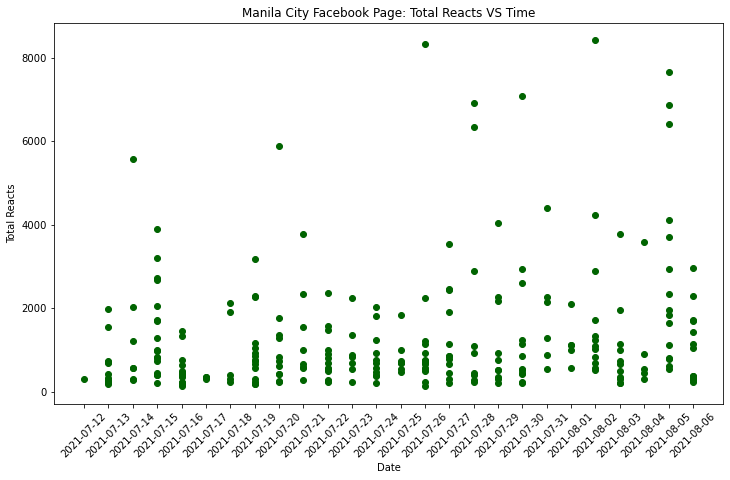

In [22]:
# MNL
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(mnl_time_df['date'],mnl_time_df['total_reacts'], color = "DarkGreen")
ax.set_xlabel('Date')
ax.set_ylabel('Total Reacts')
ax.set_title('Manila City Facebook Page: Total Reacts VS Time')
ax.tick_params(axis='x', rotation=45)

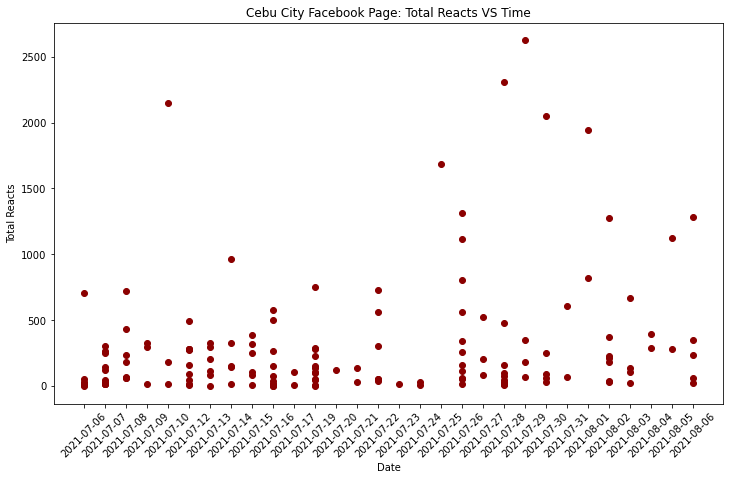

In [23]:
# CEBU
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(cebu_time_df['date'],cebu_time_df['total_reacts'], color = "DarkRed")
ax.set_xlabel('Date')
ax.set_ylabel('Total Reacts')
ax.set_title('Cebu City Facebook Page: Total Reacts VS Time')
ax.tick_params(axis='x', rotation=45)

#### Create scatter plot with data from all 3 citites from July 27 to August 6 

In [24]:
# make new col if date it < 2021-07-24 (True or False)
def check_25(date):
    return not(int(date.replace("-","")) >= 20210725)

qc_time_df['before 07-25'] = qc_time_df['date'].apply(check_25)
mnl_time_df['before 07-25'] = mnl_time_df['date'].apply(check_25)
cebu_time_df['before 07-25'] = cebu_time_df['date'].apply(check_25)

# make copy dataframes for only False
qc_after_07_25_df = qc_time_df.loc[qc_time_df.loc[:, 'before 07-25']== False,:].copy()
mnl_after_07_25_df = mnl_time_df.loc[mnl_time_df.loc[:, 'before 07-25']== False,:].copy()
cebu_after_07_25_df = cebu_time_df.loc[cebu_time_df.loc[:, 'before 07-25']== False,:].copy()

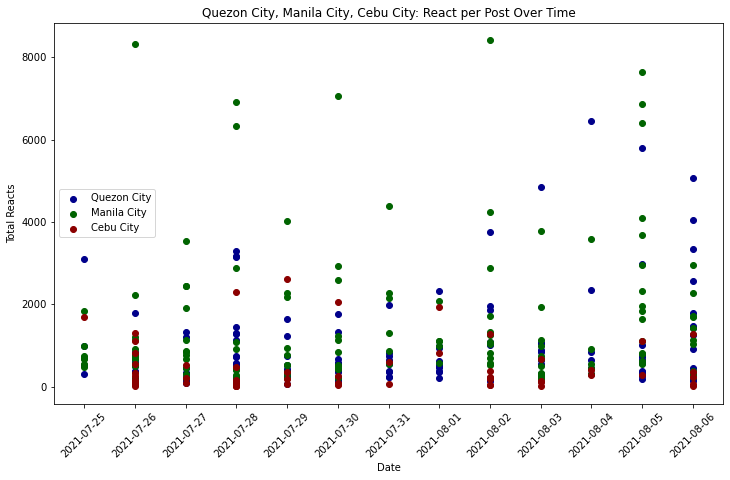

In [25]:
fig, axes = plt.subplots(figsize = (12,7))

axes.scatter(qc_after_07_25_df['date'],qc_after_07_25_df['total_reacts'], color = 'DarkBlue', label = 'Quezon City')
axes.scatter(mnl_after_07_25_df['date'],mnl_after_07_25_df['total_reacts'], color = 'DarkGreen', label = 'Manila City')
axes.scatter(cebu_after_07_25_df['date'],cebu_after_07_25_df['total_reacts'], color = 'DarkRed', label = 'Cebu City')
axes.set_xlabel('Date')
axes.set_ylabel('Total Reacts')
axes.set_title('Quezon City, Manila City, Cebu City: React per Post Over Time')
axes.legend()
axes.tick_params(axis='x', rotation=45)